# Prelude

## Import Packages

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
#%matplotlib ipympl

In [2]:
import functions.init_logger
import logging
logger = logging.getLogger(__name__)
logger.setLevel(logging.CRITICAL)

In [3]:
import functions.add_path
import functions.et_condition_df as condition_df

import functions.et_helper as et_helper
import functions.plotnine_theme
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams['figure.subplot.left'] =  0.2
from plotnine import *
from plotnine.data import *


import be_load

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5

2018-10-08 18:26:42 - OpenGL.acceleratesupport                                          - INFO     - No OpenGL_accelerate module loaded: No module named 'OpenGL_accelerate'
reached exception:pyaudio
2018-10-08 18:26:42 - lib.pupil.pupil_src.shared_modules.calibration_routines.optimization_calibration.build - INFO     - Building extension modules...
reached exception:optimization_calibration
reached exception:glfw.GLFW_PRESS
reached exception:glfw.GLFW_KEY_SPACE
reached exception:glfw.GLFW_KEY_F
reached exception:glfw.glfwSetKeyCallback
reached exception:fingertip_calibration
reached exception:glfw.GLFW_PRESS
reached exception:natural_features_calibration
2018-10-08 18:26:43 - lib.pupil.pupil_src.shared_modules.calibration_routines.optimization_calibration.build - INFO     - Building extension modules...
reached exception:optimization_calibration
2018-10-08 18:26:44 - calibration_routines.optimization_calibration.build               - INFO     - Building extension modules...
reached exc

In [4]:
import os
print(os.getcwd())
if os.getcwd()[-4:] != 'code':
    try:
        os.chdir('./code')
    except:
        os.chdir('/net/store/nbp/users/behinger/projects/etcomp/code')


/net/store/nbp/users/behinger/projects/etcomp/lib/pupil/pupil_src/shared_modules/calibration_routines/optimization_calibration


In [6]:
import BLINK
import SMOOTH
import LARGE_GRID
import LARGE_and_SMALL_GRID
import FREEVIEW
import LUM
import MICROSACC
import CALIBRATION

## Which algorithm?

In [7]:
#algorithm = 'hmmnosmooth_'
algorithm = '' # EM-algorithm
#algorithm = 'hmm_'

## Load Data

In [8]:
(etsamples,etmsgs,etevents) = be_load.load_data(algorithm=algorithm)

loading subject VP1 with et el
loading subject VP1 with et pl
loading subject VP2 with et el
loading subject VP2 with et pl
loading subject VP3 with et el
loading subject VP3 with et pl
loading subject VP4 with et el
loading subject VP4 with et pl
loading subject VP11 with et el
loading subject VP11 with et pl
loading subject VP12 with et el
loading subject VP12 with et pl
loading subject VP14 with et el
loading subject VP14 with et pl
loading subject VP15 with et el
loading subject VP15 with et pl
loading subject VP19 with et el
loading subject VP19 with et pl
loading subject VP20 with et el
loading subject VP20 with et pl
loading subject VP22 with et el
loading subject VP22 with et pl
loading subject VP23 with et el
loading subject VP23 with et pl
loading subject VP24 with et el
loading subject VP24 with et pl
loading subject VP25 with et el
loading subject VP25 with et pl
loading subject VP26 with et el
loading subject VP26 with et pl
loading subject results with et el
File b'/net/s

In [9]:
print(etsamples.subject.unique())
print("There are %i subjects"%(etsamples.subject.unique().shape))

['VP1' 'VP2' 'VP3' 'VP4' 'VP11' 'VP12' 'VP14' 'VP15' 'VP19' 'VP20' 'VP22'
 'VP23' 'VP24' 'VP25' 'VP26']
There are 15 subjects


In [10]:
if algorithm == 'hmm':
    # hmm has a very low threshold to detect smooth pursuit. We therefore use for the grid the nosmooth run of hmm
    (etsamples_grid,etmsgs_grid,etevents_grid) = be_load.load_data(algorithm='hmmnosmooth_')
else:
    # in all other cases, the '..._grid' is an alias
    etsamples_grid = etsamples
    etmsgs_grid = etmsgs
    etevents_grid = etevents

In [11]:
%%capture test
raw_large_grid_df = condition_df.get_condition_df(data=(etsamples_grid,etmsgs_grid,etevents_grid),condition='LARGE_GRID')

2018-10-08 19:56:05 - functions.et_condition_df                                         - DEBUG    - Data already loaded, just applying transformations
2018-10-08 19:56:07 - functions.et_condition_df                                         - CRITICAL - Eyetracker: el    Subject: VP1 
2018-10-08 19:56:08 - functions.et_condition_df                                         - CRITICAL - Eyetracker: pl    Subject: VP1 
2018-10-08 19:56:08 - functions.et_condition_df                                         - CRITICAL - Eyetracker: el    Subject: VP2 
2018-10-08 19:56:10 - functions.et_condition_df                                         - CRITICAL - Eyetracker: pl    Subject: VP2 
2018-10-08 19:56:10 - functions.et_condition_df                                         - CRITICAL - Eyetracker: el    Subject: VP3 
2018-10-08 19:56:12 - functions.et_condition_df                                         - CRITICAL - Eyetracker: pl    Subject: VP3 
2018-10-08 19:56:12 - functions.et_condition_df   

In [12]:
blink= condition_df.get_condition_df(data=(etsamples,etmsgs,etevents),condition="BLINK")

smooth = condition_df.get_condition_df(data=(etsamples,etmsgs,etevents),condition="SMOOTHPURSUIT")

microsaccades = MICROSACC.detect_microsaccades(etsamples=etsamples,etmsgs=etmsgs,etevents=etevents)

all_lum = LUM.process_lum(etsamples,etmsgs)
all_lum_binned = LUM.bin_lum(all_lum)

# Freeviewing
raw_freeview_df, raw_fix_count_df = condition_df.get_condition_df(data=(etsamples_grid,etmsgs_grid,etevents_grid), condition='FREEVIEW') # loads the detection where all smooth pursuits are defined as fixations

2018-10-08 19:56:36 - functions.et_condition_df                                         - DEBUG    - Data already loaded, just applying transformations
2018-10-08 19:56:37 - functions.et_condition_df                                         - CRITICAL - Eyetracker: el    Subject: VP1 


/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


2018-10-08 19:56:39 - functions.et_condition_df                                         - CRITICAL - Eyetracker: pl    Subject: VP1 
2018-10-08 19:56:40 - functions.et_condition_df                                         - CRITICAL - Eyetracker: el    Subject: VP2 
2018-10-08 19:56:41 - functions.et_condition_df                                         - CRITICAL - Eyetracker: pl    Subject: VP2 
2018-10-08 19:56:43 - functions.et_condition_df                                         - CRITICAL - Eyetracker: el    Subject: VP3 
2018-10-08 19:56:44 - functions.et_condition_df                                         - CRITICAL - Eyetracker: pl    Subject: VP3 
2018-10-08 19:56:45 - functions.et_condition_df                                         - CRITICAL - Eyetracker: el    Subject: VP4 
2018-10-08 19:56:47 - functions.et_condition_df                                         - CRITICAL - Eyetracker: pl    Subject: VP4 
2018-10-08 19:56:48 - functions.et_condition_df                      

/net/store/nbp/users/behinger/projects/etcomp/code/functions/et_helper.py:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  eventstart.loc[eventstart < mintime] = mintime
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/net/store/nbp/users/behinger/projects/etcomp/code/functions/et_helper.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vie

2018-10-08 19:57:49 - functions.detect_saccades                                         - DEBUG    - eyetracker: el
2018-10-08 19:57:49 - functions.detect_saccades                                         - DEBUG    - removing bad-samples for saccade detection
2018-10-08 19:57:49 - functions.detect_saccades                                         - DEBUG    - Start.... Detecting Saccades
2018-10-08 19:57:49 - functions.detect_saccades                                         - WARNING  - Std of velocity data [0.0229 0.0193]
2018-10-08 19:57:50 - functions.detect_saccades                                         - WARNING  - Mean overthreshold values: 0.0199
2018-10-08 19:57:50 - functions.detect_saccades                                         - WARNING  - Number of saccades detected: (110, 2)
0
2018-10-08 19:57:50 - functions.detect_saccades                                         - DEBUG    - Done... Detecting Saccades
2018-10-08 19:57:50 - MICROSACC                                     

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


2018-10-08 19:58:07 - functions.detect_saccades                                         - DEBUG    - Done... Detecting Saccades
2018-10-08 19:58:07 - MICROSACC                                                         - INFO     - Removed 0 saccades larger than amplitude 2°
2018-10-08 19:58:07 - functions.et_condition_df                                         - DEBUG    - Data already loaded, just applying transformations
2018-10-08 19:58:07 - functions.et_condition_df                                         - CRITICAL - Eyetracker: pl    Subject: VP1 
2018-10-08 19:58:07 - MICROSACC                                                         - INFO     - subject==@subject&eyetracker==@eyetracker
2018-10-08 19:58:09 - functions.detect_saccades                                         - DEBUG    - eyetracker: el
2018-10-08 19:58:09 - functions.detect_saccades                                         - DEBUG    - removing bad-samples for saccade detection
2018-10-08 19:58:09 - functions.detect_

In [13]:
raw_all_grids_df = condition_df.get_condition_df(data=(etsamples_grid,etmsgs_grid,etevents_grid), condition='LARGE_and_SMALL_GRID')

2018-10-08 20:06:24 - functions.et_condition_df                                         - DEBUG    - Data already loaded, just applying transformations
2018-10-08 20:06:26 - functions.et_condition_df                                         - CRITICAL - Eyetracker: el    Subject: VP1 
2018-10-08 20:06:27 - functions.et_condition_df                                         - CRITICAL - Eyetracker: pl    Subject: VP1 
2018-10-08 20:06:28 - functions.et_condition_df                                         - CRITICAL - Eyetracker: el    Subject: VP2 
2018-10-08 20:06:29 - functions.et_condition_df                                         - CRITICAL - Eyetracker: pl    Subject: VP2 
2018-10-08 20:06:30 - functions.et_condition_df                                         - CRITICAL - Eyetracker: el    Subject: VP3 
2018-10-08 20:06:31 - functions.et_condition_df                                         - CRITICAL - Eyetracker: pl    Subject: VP3 
2018-10-08 20:06:32 - functions.et_condition_df   

In [14]:
tilt = condition_df.get_condition_df(data=(etsamples,etmsgs,etevents),condition='TILT')
shake = condition_df.get_condition_df(data=(etsamples,etmsgs,etevents),condition='SHAKE')

2018-10-08 20:06:57 - functions.et_condition_df                                         - DEBUG    - Data already loaded, just applying transformations
2018-10-08 20:06:58 - functions.et_condition_df                                         - CRITICAL - Eyetracker: el    Subject: VP1 


/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


2018-10-08 20:07:00 - functions.et_condition_df                                         - CRITICAL - Eyetracker: pl    Subject: VP1 
2018-10-08 20:07:01 - functions.et_condition_df                                         - CRITICAL - Eyetracker: el    Subject: VP2 
2018-10-08 20:07:02 - functions.et_condition_df                                         - CRITICAL - Eyetracker: pl    Subject: VP2 
2018-10-08 20:07:04 - functions.et_condition_df                                         - CRITICAL - Eyetracker: el    Subject: VP3 
2018-10-08 20:07:05 - functions.et_condition_df                                         - CRITICAL - Eyetracker: pl    Subject: VP3 
2018-10-08 20:07:06 - functions.et_condition_df                                         - CRITICAL - Eyetracker: el    Subject: VP4 
2018-10-08 20:07:08 - functions.et_condition_df                                         - CRITICAL - Eyetracker: pl    Subject: VP4 
2018-10-08 20:07:09 - functions.et_condition_df                      

# Calibration Accuracy

## Load Data

In [ ]:
err = pd.DataFrame()

for subject in etsamples.subject.unique():
    err = pd.concat([err,CALIBRATION.pl_accuracy(subject),CALIBRATION.el_accuracy(subject)],ignore_index=True)
err.loc[:,'avg'] = err.avg.astype(float)
err.loc[:,'msg_time'] = err.msg_time.astype(float) 

In [ ]:
err.subject.unique()

## Results

In [ ]:
ggplot(err,aes(x="eyetracker",y="avg"))+geom_jitter()+geom_hline(yintercept=[0.5,1.5])#+facet_wrap("~subject")

# Large Grid

## Methods

#### Single Trial view

In [ ]:
%matplotlib ipympl
from functions import et_helper
et_helper.plot_around_event(etsamples_grid,etmsgs_grid,etevents_grid,raw_large_grid_df.query("eyetracker=='pl'&subject=='VP4'&block=='1'").iloc[5],plusminus=(-2,5))


In [ ]:
%matplotlib ipympl
et_helper.plot_around_event(etsamples_grid,etmsgs_grid,etevents_grid,raw_large_grid_df.query("eyetracker=='el'&subject=='VP11'&block=='6'").iloc[9],plusminus=(-2,5))

In [15]:
%matplotlib inline

2018-10-08 22:00:24 - matplotlib.backends                                               - DEBUG    - backend module://ipykernel.pylab.backend_inline version unknown


## Results

#### Accuracy Table

In [16]:
LARGE_GRID.make_table_accuracy_winmean(raw_large_grid_df)

/net/store/nbp/users/behinger/projects/etcomp/code/LARGE_GRID.py:114: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  winmeanWinmeanWinmean_group.assign(cumtype='winmeanWinmeanWinmean')


,accuracy,cumtype,duration,element,end_time,et,grid_size,hori_accuracy,mean_gx,mean_gy,msg_time,posx,posy,rms,start_time,vert_accuracy
0,0.91,meanMedianMean,3.47,25.97,1940.45,EyeLink,49.0,0.79,-0.24,0.00,1935.22,-0.00,-0.00,0.04,1935.59,0.82
1,1.29,meanMedianMean,1.10,25.95,1936.66,Pupil Labs,49.0,1.13,-0.25,0.18,1935.23,0.03,0.00,0.23,1935.55,1.19
0,1.15,meanMeanMean,3.87,25.94,1890.93,EyeLink,49.0,1.05,-0.16,-0.02,1886.67,0.01,-0.00,0.05,1887.06,0.92
1,1.71,meanMeanMean,1.14,26.00,1888.45,Pupil Labs,49.0,1.52,-0.21,0.21,1886.98,0.03,0.01,0.24,1887.31,1.41
0,0.80,winmeanWinmeanWinmean,1.05,26.00,1811.25,EyeLink,49.0,0.69,-0.17,-0.03,1809.81,-0.00,0.00,0.04,1810.18,0.73
1,1.19,winmeanWinmeanWinmean,1.09,25.98,1811.21,Pupil Labs,49.0,1.03,-0.24,0.16,1809.77,0.01,0.02,0.19,1810.06,1.08


In [ ]:
LARGE_GRID.make_table_accuracy(raw_large_grid_df)

### Duration and Duration diff

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:363: UserWarning: stat_density : Removed 72 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:363: UserWarning: stat_density : Removed 72 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


2018-10-08 22:00:53 - matplotlib.font_manager                                           - DEBUG    - findfont: Matching :family=DejaVu Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=9.600000000000001 to DejaVu Sans ('/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
2018-10-08 22:00:53 - matplotlib.font_manager                                           - DEBUG    - findfont: Matching :family=DejaVu Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
2018-10-08 22:00:53 - matplotlib.font_manager                                           - DEBUG    - findfont: Matching :family=DejaVu Sans:style=normal:variant=normal:weight=bold:stretch=normal:size=9.600000000000001

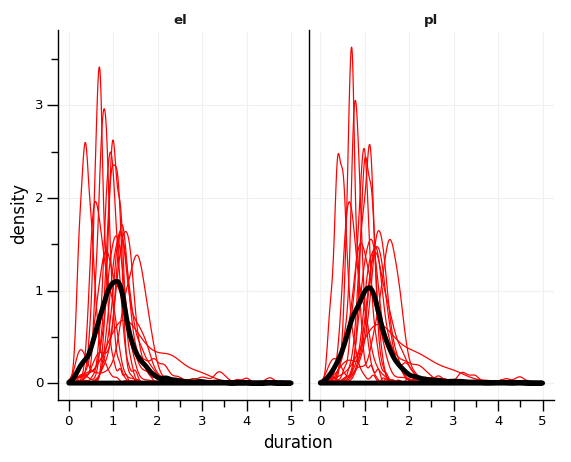

<ggplot: (8750819865671)>

In [17]:
ggplot(raw_large_grid_df,aes(x="duration"))+geom_density(aes(group='subject'),color='red',alpha=0.1)+geom_density(color='black',size=2)+facet_grid("~eyetracker")+xlim([0,5])

In [18]:
def difference_function(x):
    if x.shape[0] == 1:
        return np.nan
    else:
        return np.diff(x)

In [19]:
diff_large_grid_df = raw_large_grid_df.groupby(["element","block","subject"],as_index=False).duration.agg(difference_function)

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:363: UserWarning: stat_density : Removed 371 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:363: UserWarning: stat_density : Removed 371 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


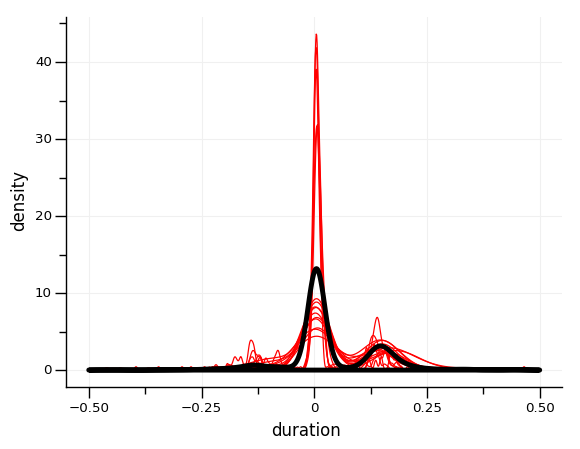

<ggplot: (8750819958192)>

In [20]:
ggplot(diff_large_grid_df,aes(x="duration"))+geom_density(aes(group='subject'),alpha=0.3,color='red')+geom_density(color='black',size=2)+xlim([-0.5,0.5])

In [21]:
raw_large_grid_df.query("element>48 &subject=='VP1'&block=='1'")

,block,element,type,end_time,mean_gx,duration,start_time,rms,mean_gy,condition,exp_event,grid_size,msg_time,posx,posy,hori_accuracy,vert_accuracy,accuracy,et,eyetracker,subject
47,1,49.0,fixation,123.513000,11.837492,1.2540,122.259000,0.025203,-15.513091,GRID,element,49.0,121.651000,12.495718,-15.455667,0.658227,0.057424,0.658338,EyeLink,el,VP1
48,1,50.0,fixation,748.781000,-0.576317,114.0460,634.735000,0.210414,3.517753,GRID,element,49.0,632.755000,0.000000,0.000000,0.576317,3.517753,0.576317,EyeLink,el,VP1
46,1,49.0,fixation,123.517120,11.404884,1.5456,121.971353,0.135445,-17.348436,GRID,element,49.0,121.654279,12.495718,-15.455667,1.090834,1.892769,1.158962,Pupil Labs,pl,VP1
47,1,50.0,fixation,637.787062,-3.069803,2.9526,634.834143,0.129368,-3.987514,GRID,element,49.0,632.757857,0.000000,0.000000,3.069803,3.987514,3.069803,Pupil Labs,pl,VP1


In [22]:
elsamples, elmsgs, elevents = et_helper.load_file('el','VP2',cleaned=True)

In [ ]:
tmp = elsamples.query('smpl_time>2480&smpl_time<2530')
plt.figure()
plt.plot(tmp.smpl_time,tmp.gx,'o')

In [ ]:
elmsgs.loc[417]

In [ ]:
et_helper.plot_around_event(etsamples_grid,etmsgs_grid,etevents_grid,raw_large_grid_df.query("element=='50'&subject=='VP2'").iloc[1],plusminus=(-3,2),bothET=True,plotevents=False)

In [ ]:
raw_large_grid_df.groupby(["subject","eyetracker"],as_index=False).duration.agg(winmean).groupby("eyetracker").agg(winmean)

#### Accuracy Plots

used the winsorized mean function
used the winsorized mean function
2018-10-08 22:01:33 - matplotlib.font_manager                                           - DEBUG    - findfont: Matching :family=STIXGeneral:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to STIXGeneral ('/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneral.ttf') with score of 0.050000
2018-10-08 22:01:33 - matplotlib.font_manager                                           - DEBUG    - findfont: Matching :family=STIXSizeOneSym:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to STIXSizeOneSym ('/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizOneSymReg.ttf') with score of 0.050000
2018-10-08 22:01:33 - matplotlib.font_manager                                           - DEBUG    - findfont: Matching :family=STIXSizeTwoSym:style=

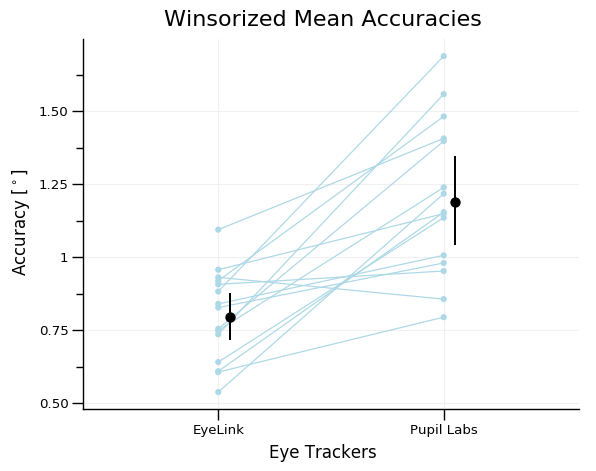

<ggplot: (-9223363286034780195)>

In [24]:
LARGE_GRID.plot_accuracy(raw_large_grid_df)

used the winsorized mean function
used the winsorized mean function


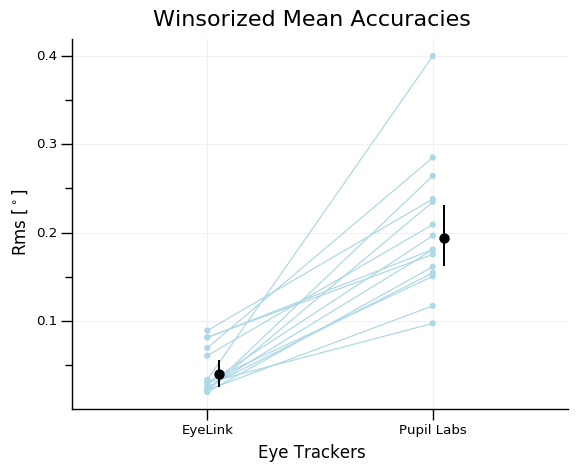

<ggplot: (-9223363286034800254)>

In [25]:
LARGE_GRID.plot_accuracy(raw_large_grid_df,depvar='rms')

#### Single Subject Grid

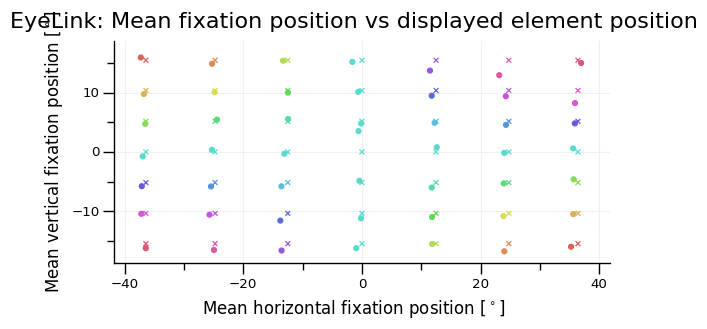

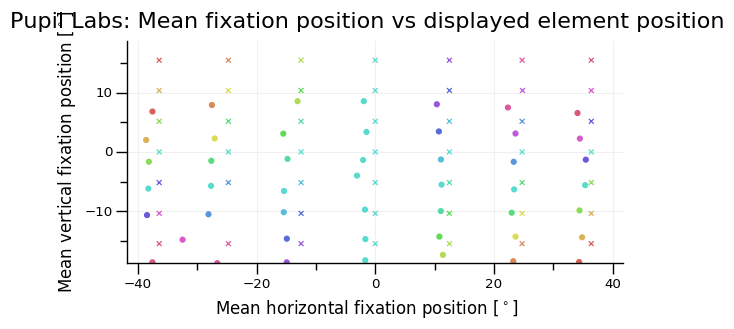

In [26]:
LARGE_GRID.display_fixations(raw_large_grid_df, option='offset',input_subject="VP1",input_block='1')

#### Grid element centered plot

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:452: UserWarning: geom_point : Removed 121 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


2018-10-08 22:01:57 - matplotlib.font_manager                                           - DEBUG    - findfont: Matching :family=DejaVu Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=9.0 to DejaVu Sans ('/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000


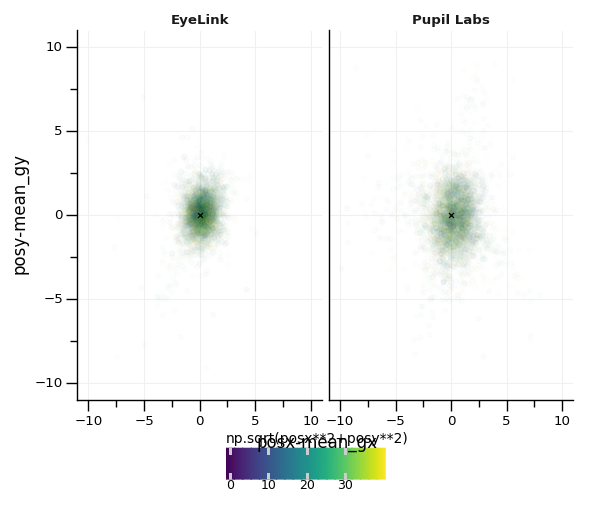

<ggplot: (-9223363286040149728)>

In [27]:
LARGE_GRID.display_fixation_centered(raw_large_grid_df)+xlim((-10,10))+ylim((-10,10))

#### Position vs Accuracy

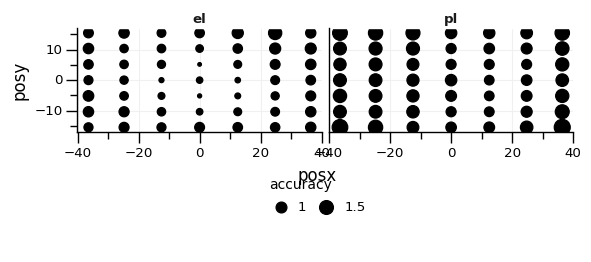

<ggplot: (8750814675176)>

In [29]:
from functions.et_helper import winmean
(ggplot(raw_large_grid_df.groupby(['eyetracker','posx','posy'],as_index=False).agg(winmean),aes(x="posx",y="posy",size="accuracy"))+geom_point()+facet_wrap("~eyetracker"))+coord_fixed()

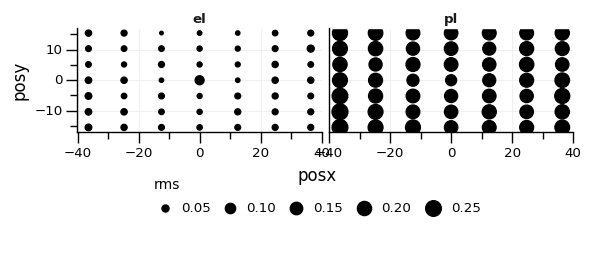

<ggplot: (-9223363286040034479)>

In [30]:
(ggplot(raw_large_grid_df.groupby(['eyetracker','posx','posy'],as_index=False).agg(winmean),aes(x="posx",y="posy",size="rms"))+geom_point()+facet_wrap("~eyetracker"))+coord_fixed()

#### Engbert vs. HMM
This can be thought of a precursor to compare different pupillabs detection algorithms e.g. (3D vs 2D)

In [31]:
if algorithm == '':
    etsamples_engbert = etsamples
    etmsgs_engbert = etmsgs
    etevents_engbert = etevents
    raw_large_grid_df_engbert = raw_large_grid_df
    
    (etsamples_hmm,etmsgs_hmm,etevents_hmm) = be_load.load_data(algorithm='hmmnosmooth_')
    raw_large_grid_df_hmm = condition_df.get_condition_df(data=(etsamples_hmm,etmsgs_hmm,etevents_hmm),condition='LARGE_GRID')
else:
    etsamples_hmm = etsamples
    etmsgs_hmm = etmsgs
    etevents_hmm = etevents
    raw_large_grid_df_hmm = raw_large_grid_df
    
    (etsamples_engbert,etmsgs_engbert,etevents_engbert) = be_load.load_data(algorithm='')
    raw_large_grid_df_engbert = condition_df.get_condition_df(data=(etsamples_engbert,etmsgs_engbert,etevents_engbert),condition='LARGE_GRID')

loading subject VP1 with et el
loading subject VP1 with et pl
loading subject VP2 with et el
loading subject VP2 with et pl
loading subject VP3 with et el
loading subject VP3 with et pl
loading subject VP4 with et el
loading subject VP4 with et pl
loading subject VP11 with et el
loading subject VP11 with et pl
loading subject VP12 with et el
loading subject VP12 with et pl
loading subject VP14 with et el
loading subject VP14 with et pl
loading subject VP15 with et el
loading subject VP15 with et pl
loading subject VP19 with et el
loading subject VP19 with et pl
loading subject VP20 with et el
loading subject VP20 with et pl
loading subject VP22 with et el
loading subject VP22 with et pl
loading subject VP23 with et el
loading subject VP23 with et pl
loading subject VP24 with et el
loading subject VP24 with et pl
loading subject VP25 with et el
loading subject VP25 with et pl
loading subject VP26 with et el
loading subject VP26 with et pl
loading subject results with et el
File b'/net/s

In [32]:
GRID_accuracy_table = pd.concat(
    [LARGE_GRID.make_table_accuracy_winmean(raw_large_grid_df_hmm).assign(    algorithm='hmm_nosmooth'),
     LARGE_GRID.make_table_accuracy_winmean(raw_large_grid_df_engbert).assign(algorithm='engbert'     )])
GRID_accuracy_table

/net/store/nbp/users/behinger/projects/etcomp/code/LARGE_GRID.py:114: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  winmeanWinmeanWinmean_group.assign(cumtype='winmeanWinmeanWinmean')


,accuracy,cumtype,duration,element,end_time,et,grid_size,hori_accuracy,mean_gx,mean_gy,msg_time,posx,posy,rms,start_time,vert_accuracy,algorithm
0,0.94,meanMedianMean,3.29,25.93,1940.39,EyeLink,49.0,0.83,-0.23,-0.02,1935.17,-0.00,-0.00,0.05,1935.71,0.85,hmm_nosmooth
1,1.25,meanMedianMean,0.81,25.80,1936.34,Pupil Labs,49.0,1.10,-0.31,0.24,1934.97,-0.00,-0.00,0.07,1935.54,1.17,hmm_nosmooth
0,1.26,meanMeanMean,3.71,25.86,1891.10,EyeLink,49.0,1.16,-0.08,-0.10,1886.83,-0.00,-0.00,0.11,1887.39,1.02,hmm_nosmooth
1,1.66,meanMeanMean,0.84,25.87,1888.53,Pupil Labs,49.0,1.48,-0.27,0.25,1887.10,-0.03,0.00,0.09,1887.69,1.38,hmm_nosmooth
0,0.80,winmeanWinmeanWinmean,0.89,25.93,1811.05,EyeLink,49.0,0.70,-0.14,-0.05,1809.62,-0.00,0.00,0.02,1810.20,0.73,hmm_nosmooth
1,1.17,winmeanWinmeanWinmean,0.81,25.80,1811.11,Pupil Labs,49.0,1.01,-0.35,0.19,1809.69,-0.00,0.00,0.07,1810.19,1.03,hmm_nosmooth
0,0.91,meanMedianMean,3.47,25.97,1940.45,EyeLink,49.0,0.79,-0.24,0.00,1935.22,-0.00,-0.00,0.04,1935.59,0.82,engbert
1,1.29,meanMedianMean,1.10,25.95,1936.66,Pupil Labs,49.0,1.13,-0.25,0.18,1935.23,0.03,0.00,0.23,1935.55,1.19,engbert
0,1.15,meanMeanMean,3.87,25.94,1890.93,EyeLink,49.0,1.05,-0.16,-0.02,1886.67,0.01,-0.00,0.05,1887.06,0.92,engbert
1,1.71,meanMeanMean,1.14,26.00,1888.45,Pupil Labs,49.0,1.52,-0.21,0.21,1886.98,0.03,0.01,0.24,1887.31,1.41,engbert


## Statistical Model Tests (Beta)

In [ ]:
%load_ext rpy2.ipython
%Rpush raw_large_grid_df

In [ ]:
%%R
library(lme4)
raw_large_grid_df$et = factor(raw_large_grid_df$et)
contrasts(raw_large_grid_df$et)=c(-0.5,0.5)
mres <- lmer(accuracy ~ 1+et +  ( 1 + et | subject/block ) ,data = raw_large_grid_df)
summary(mres)

In [ ]:
%%R
#this cell takes very long to run!

#library(robustlmm)
#rmres <- rlmer(accuracy ~ 1+et +  ( 1 + et | subject/block ) ,data = raw_large_grid_df,verbose=0)
#summary(rmres)

## Supplementary

In [ ]:
# investigate on the position and properties of detected fixations
LARGE_GRID.display_fixations(raw_large_grid_df, option='fixations')

# Blinks

In [33]:
blink.duration = blink.end_time - blink.start_time

blink.query("duration==0").shape # number of blinks removed because they have duration 0

(19, 36)

In [34]:
blink = blink.query("duration>0") # this removes the eyelin wrong blinks, they are in there since importing the data

## Results

#### Number of Blinks

used the winsorized mean function
used the winsorized mean function


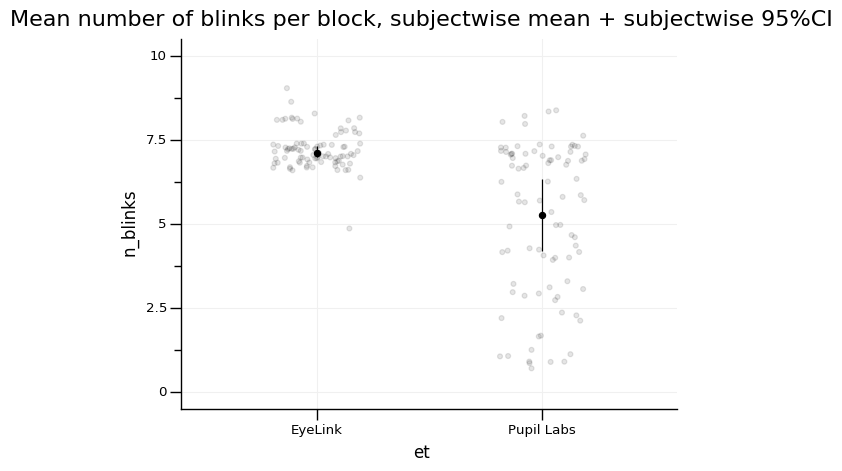

In [35]:
BLINK.plot_count(blink)

#### Duration of Blinks

used the winsorized mean function
used the winsorized mean function


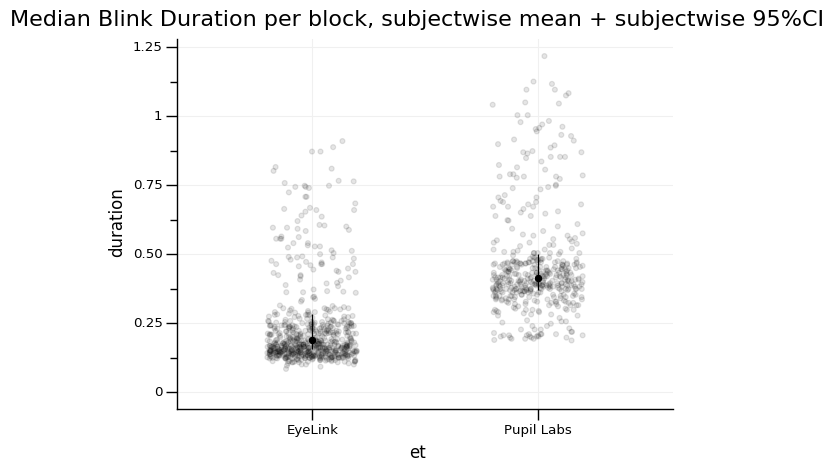

In [36]:
BLINK.plot_duration(blink)

#### Subject-wise number + duration

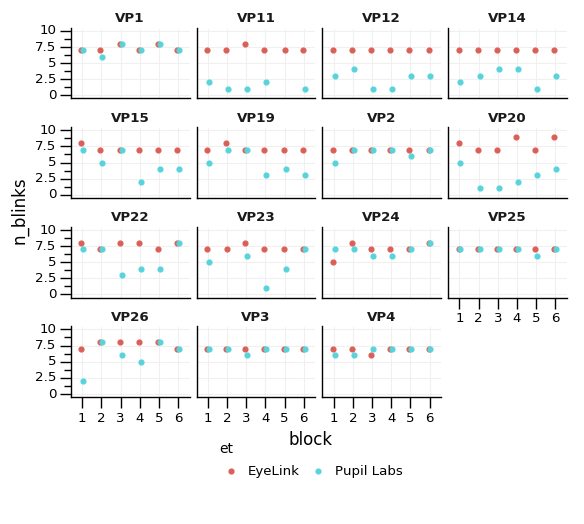

In [37]:
BLINK.plot_count(blink,option="facet_subjects")

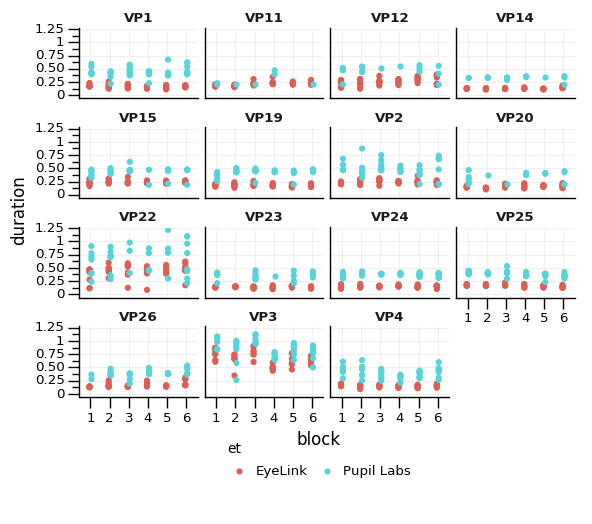

In [38]:
BLINK.plot_duration(blink,option="facet_subjects")

# Smooth Pursuit

## Load Smooth Data

In [39]:
# this loads the bayesian model results
cfg = {'redo':False} # should be specified in the beginning of the notebook
if cfg['redo']:
    smoothresult = SMOOTH.fit_bayesian_model(etsamples,etmsgs,etevents)
    SMOOTH.save_smooth(smoothresult)
else:
    smoothresult = SMOOTH.load_smooth()

## Methods

The model: Changepoint $\tau$ with  $pos  = \beta_{const}$ if $t<\tau$ and $pos = \beta_{const} + time * \beta_{velocity}$ if $t>=\tau$

#### Single Trial Modelfit

In [ ]:
smooth_stanmodel = SMOOTH.compileModel() # to facilitate plotting 

In [ ]:
#%matplotlib ipympl
plt.rcParams['figure.figsize'] = [15, 10]
plt.figure()
fitA = SMOOTH.plot_single_trial(etsamples,etmsgs,None,'VP4','el',2,6,smooth_stanmodel) # trial 1, block 1
fitB = SMOOTH.plot_single_trial(etsamples,etmsgs,None,'VP4','pl',2,6,smooth_stanmodel) # trial 1, block 1

In [ ]:
#%matplotlib inline

Main Results follow. First latency, then estimated velocity

## Results

#### Initial Latency

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:363: UserWarning: stat_summary : Removed 3 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


used the winsorized mean function
used the winsorized mean function


/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:452: UserWarning: geom_point : Removed 3 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


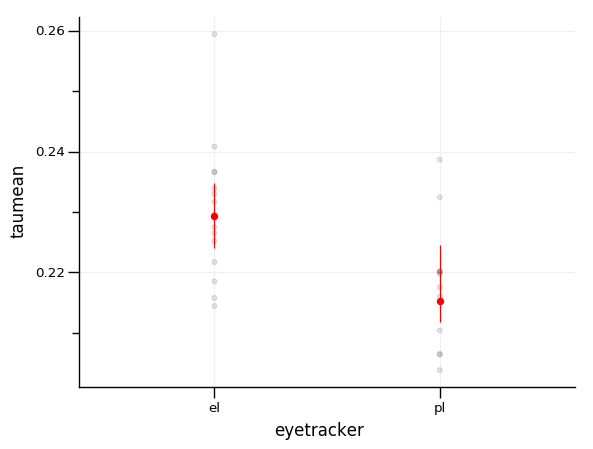

In [43]:
import SMOOTH
%autoreload 2
SMOOTH.plot_modelresults(smoothresult,field="taumean",option="")

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:363: UserWarning: stat_bin : Removed 3 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


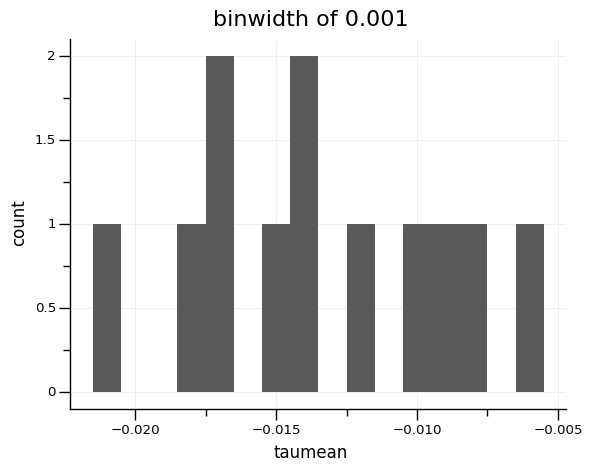

In [41]:
SMOOTH.plot_modelresults(smoothresult,field="taumean",option="difference")

#### Velocity

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:363: UserWarning: stat_summary : Removed 3 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


used the winsorized mean function
used the winsorized mean function


/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:452: UserWarning: geom_point : Removed 3 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


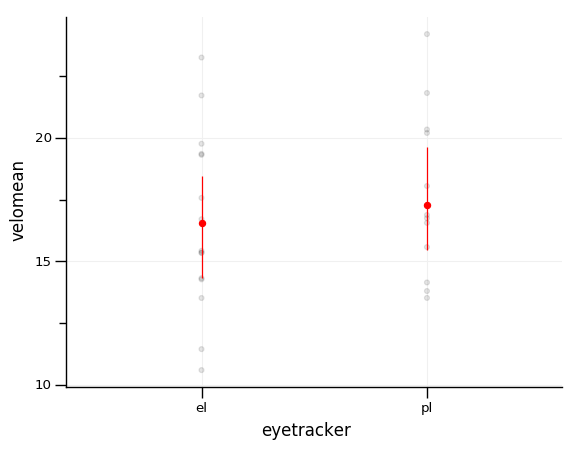

In [44]:
SMOOTH.plot_modelresults(smoothresult,field="velomean",option="")

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:363: UserWarning: stat_bin : Removed 3 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


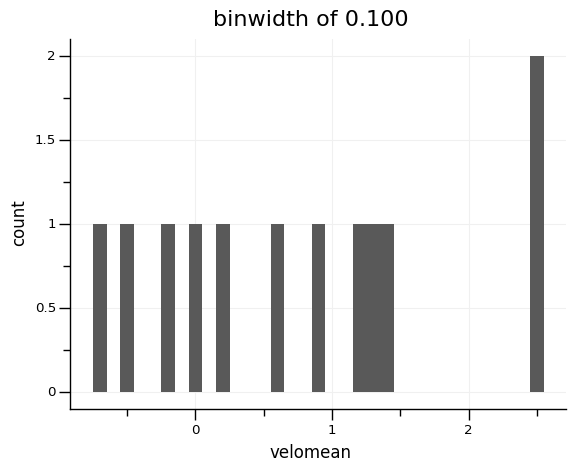

In [45]:
SMOOTH.plot_modelresults(smoothresult,field="velomean",option="difference")

#### Catchup Saccade Amplitudes

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:363: UserWarning: stat_summary : Removed 2 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function


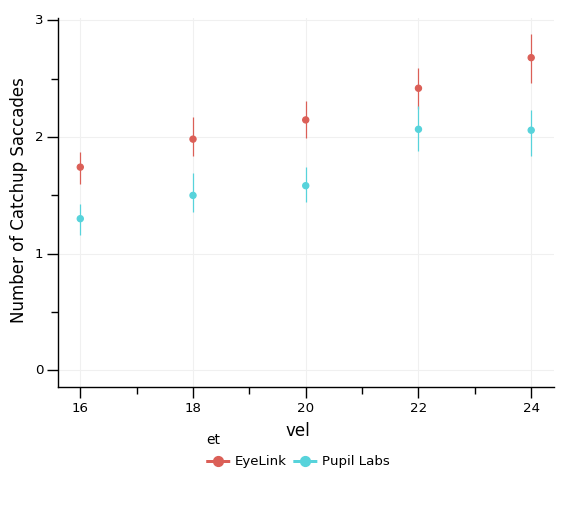

<ggplot: (-9223363286043347410)>

In [47]:
SMOOTH.plot_catchup_amplitudes(smooth)+expand_limits(y = 0)

# Microsaccades

## Results

Index(['eyetracker', 'subject', 'count', 'amplitude winmean'], dtype='object')
used the winsorized mean function
used the winsorized mean function


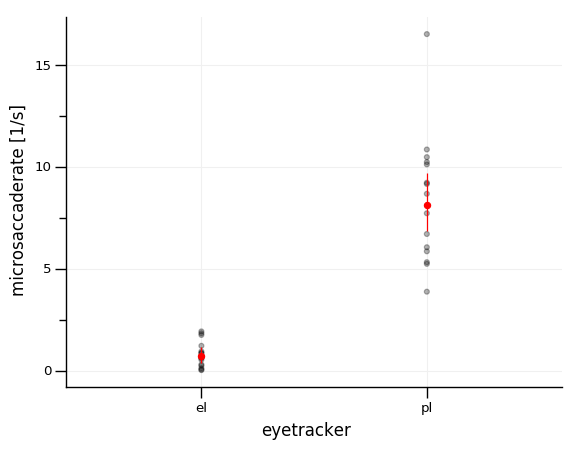

<ggplot: (-9223363286043387988)>

In [54]:
# 6 blocks x 20s
MICROSACC.plot_default(microsaccades,subtype="count/(6*20)")+ylab("microsaccaderate [1/s]")

It is highly unlikely to have ~7 microsaccades per second. Pupillabs eyetracker does not seem able to find microsaccades without tweaking the algorithm.

Index(['eyetracker', 'subject', 'count', 'amplitude winmean'], dtype='object')
used the winsorized mean function
used the winsorized mean function


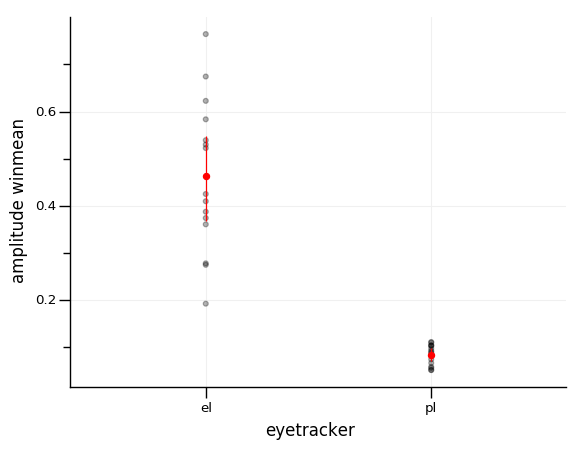

<ggplot: (8750811387852)>

In [56]:
MICROSACC.plot_default(microsaccades,subtype="amplitude winmean")

In [ ]:
MICROSACC.plot_densities(microsaccades)

In [ ]:
MICROSACC.plot_mainsequence(microsaccades)+coord_cartesian(xlim=(-3,1))

# Pupil Dilation

## Results

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:363: UserWarning: stat_summary : Removed 5970 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winso

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:452: UserWarning: geom_vline : Removed 1 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


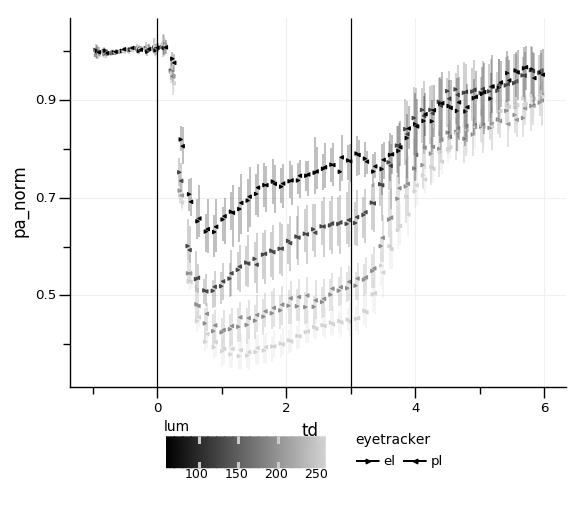

<ggplot: (-9223363286043403141)>

In [57]:
LUM.plot_time_all(all_lum_binned)

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/geoms/geom_path.py:75: UserWarning: geom_path: Removed 46 rows containing missing values.
  warn(msg.format(n1-n2))
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:452: UserWarning: geom_vline : Removed 1 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/guides/guides.py:200: UserWarning: Cannot generate legend for the 'shape' aesthetic. Make sure you have mapped a variable to it
  "variable to it".format(output))


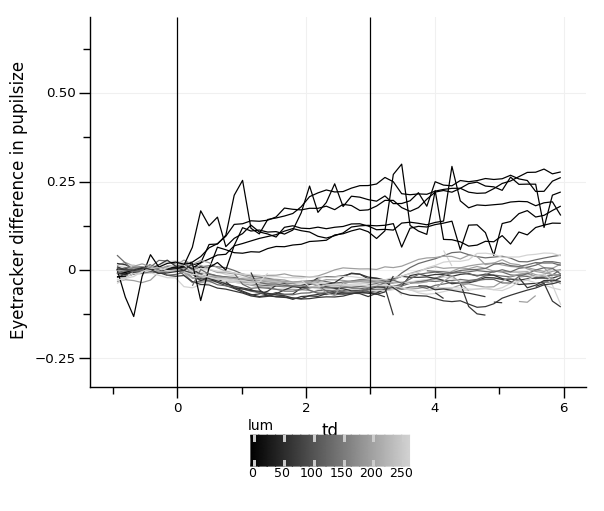

<ggplot: (8750796513165)>

In [58]:
LUM.plot_time_diff(all_lum_binned,subject="VP3")

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:363: UserWarning: stat_summary : Removed 2 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function


/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:452: UserWarning: geom_point : Removed 2 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


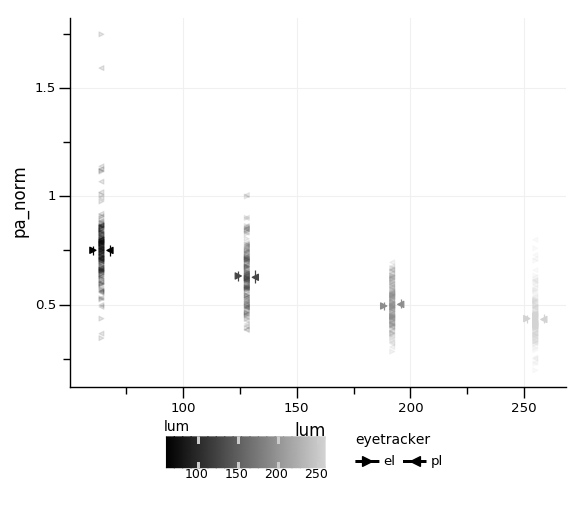

<ggplot: (-9223363286034995540)>

In [59]:
LUM.plot_mean(all_lum)

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:363: UserWarning: stat_summary : Removed 10 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winso

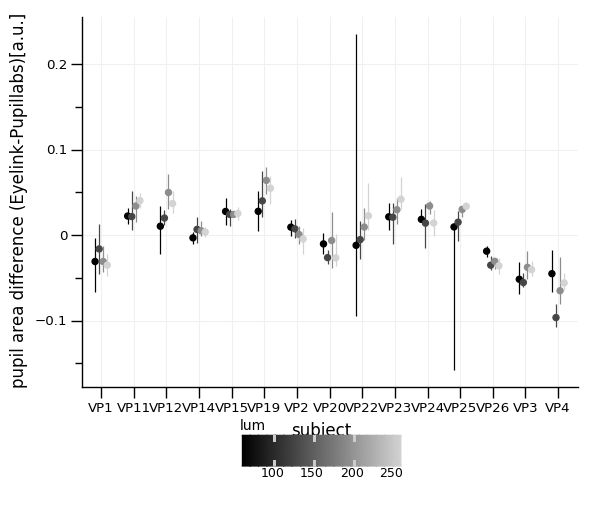

<ggplot: (8750823173524)>

In [60]:
LUM.plot_diff(all_lum)

In [63]:
mean_lum = LUM.calc_mean(all_lum)
diff_lum = mean_lum.query("lum>0").groupby(["lum","block","subject"],as_index=False).pa_norm.agg(np.diff)
diff_lum.loc[:,'pa_norm'] = pd.to_numeric(diff_lum.loc[:,'pa_norm'])
sublist = diff_lum.query("lum>210").groupby("subject").agg("mean").sort_values(by="pa_norm").index

subject_cat = pd.api.types.CategoricalDtype(categories=sublist, ordered=True)

# Cast the existing categories into the new category. Due to a bug in pandas
# we need to do this via a string.
diff_lum.loc[:,'subject'] = diff_lum['subject'].astype(str).astype(subject_cat)

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:363: UserWarning: stat_summary : Removed 10 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winso

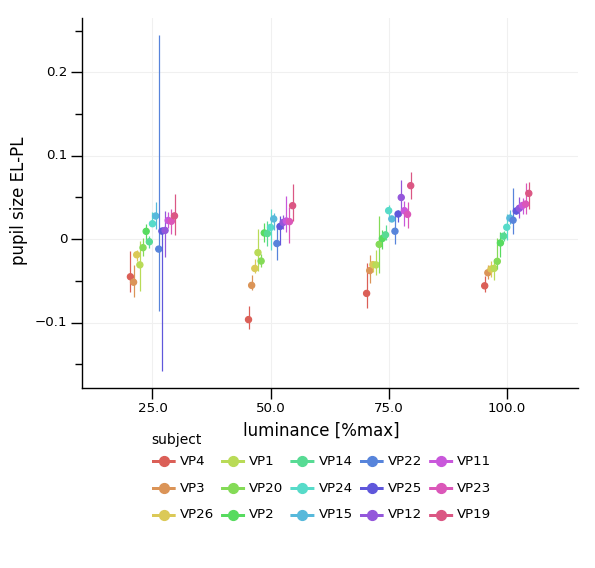

<ggplot: (-9223363286035040501)>

In [66]:
from functions.et_helper import winmean_cl_boot
ggplot(diff_lum,aes(x="factor(round(lum/255*100))",y="pa_norm",color="subject",group="subject"))+stat_summary(fun_data=winmean_cl_boot,position=position_dodge(width=0.4))+xlab('luminance [%max]')+ylab("pupil size EL-PL")

### TODO: Fix this and make it available for all subjects.

In [ ]:
from functions.detect_saccades import interpolate_gaze
def wrapper_interpolate(x,fs=120):
    print("working on et:%s, subject:%s"%(x.iloc[0]['eyetracker'],x.iloc[0]['subject']))
    tmp = interpolate_gaze(x,fs=fs)
    tmp.loc[:,"eyetracker"] = x.iloc[0]['eyetracker']
    tmp.loc[:,"subject"] = x.iloc[0]['subject']
    return(tmp)
etsamples_100hz = etsamples.query("subject=='VP3'").groupby(["eyetracker","subject"],as_index=False).apply(lambda x:wrapper_interpolate(x,fs=100))

In [ ]:
"pa" in etsamples_100hz.columns

In [ ]:
etsamples_100hz = etsamples_100hz.query("smpl_time>%.2f"%(max(etsamples_100hz.groupby(["eyetracker"]).smpl_time.agg(min))))

In [ ]:
# currently not working
#etsamples_100hz.loc[etsamples_100hz.eyetracker=='el','pa_diff']=etsamples_100hz.query("eyetracker=='el'").pa.values-etsamples_100hz.query("eyetracker=='pl'").pa.values

In [ ]:
#currently not working
#ggplot(etsamples_100hz.loc[1:35000].query("eyetracker=='el'"),aes(x="pa",y="pa_diff"))+geom_point()

# Freeviewing

## Results

2018-10-08 22:23:52 - matplotlib.font_manager                                           - DEBUG    - findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
2018-10-08 22:23:52 - matplotlib.font_manager                                           - DEBUG    - findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000


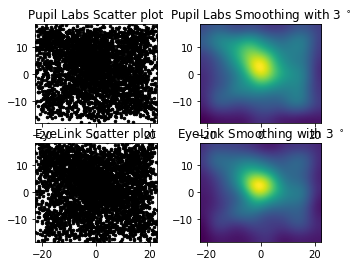

In [67]:
# plot the fixations as a heatmap
# TODO annotation how many fixations from how many pictures are used for each eyetracker
FREEVIEW.plot_heatmap(raw_freeview_df,raw_fix_count_df)

used the winsorized mean function
used the winsorized mean function


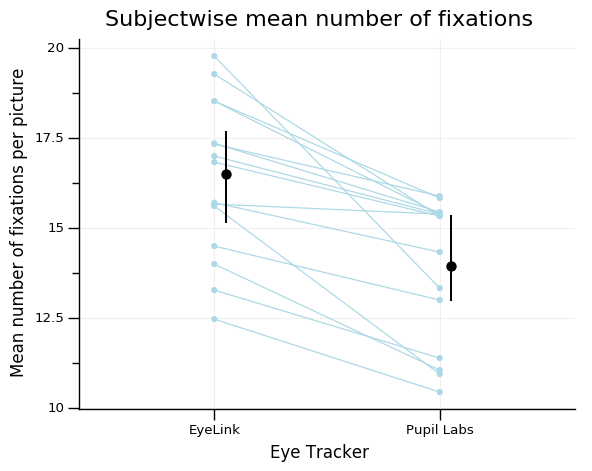

<ggplot: (8750814840696)>

In [68]:
# plot fixation counts
FREEVIEW.plot_number_of_fixations(raw_fix_count_df, option=None)

In [72]:
# plot histogram of the counts
FREEVIEW.plot_histogram(raw_fix_count_df)

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:363: UserWarning: stat_density : Removed 166 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


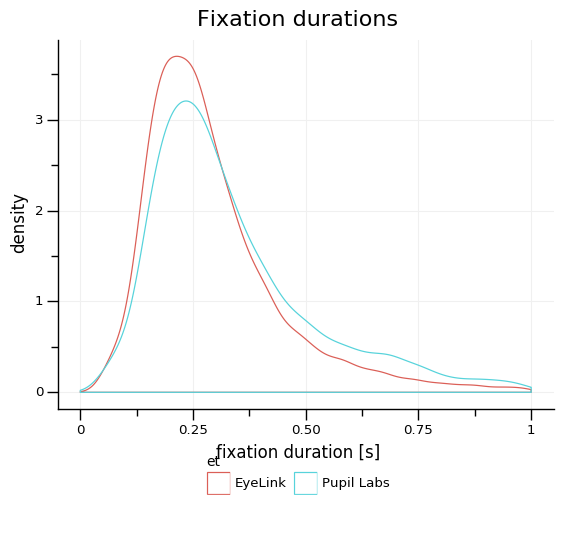

<ggplot: (-9223363286034930116)>

In [70]:
# plot fixation durations
FREEVIEW.plot_fixation_durations(raw_freeview_df)

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:363: UserWarning: stat_density : Removed 166 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


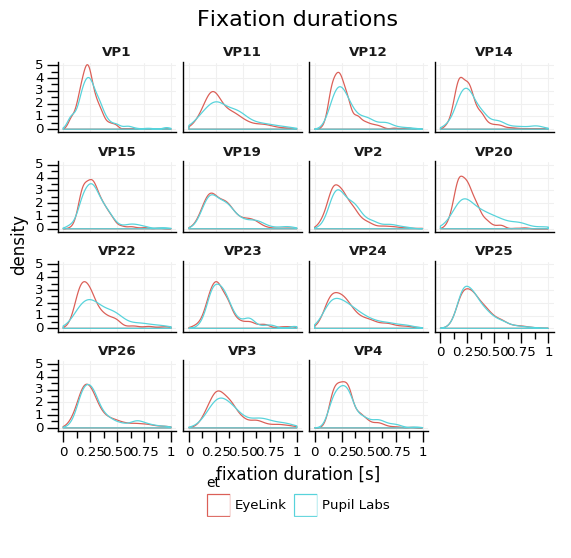

<ggplot: (-9223363286040047756)>

In [71]:
FREEVIEW.plot_fixation_durations(raw_freeview_df, option='facet_subjects')

In [ ]:
# TODO plot main sequence
#FREEVIEW.plot_main_sequence(raw_freeview_df)

# Small Grid

used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function


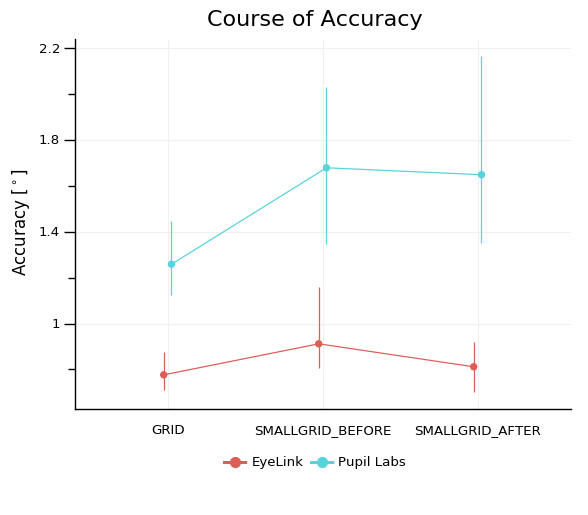

<ggplot: (-9223363286031693715)>

In [73]:
LARGE_and_SMALL_GRID.plot_accuracy(raw_all_grids_df, option='final_figure')

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:452: UserWarning: geom_point : Removed 1080 rows containing missing values.
  self.data = self.geom.handle_na(self.data)
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:452: UserWarning: geom_point : Removed 1080 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


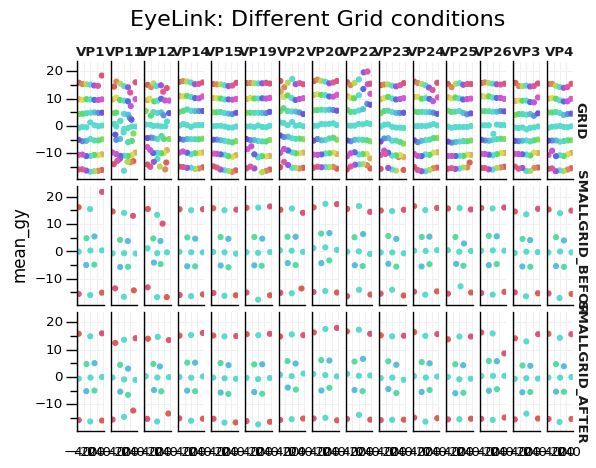

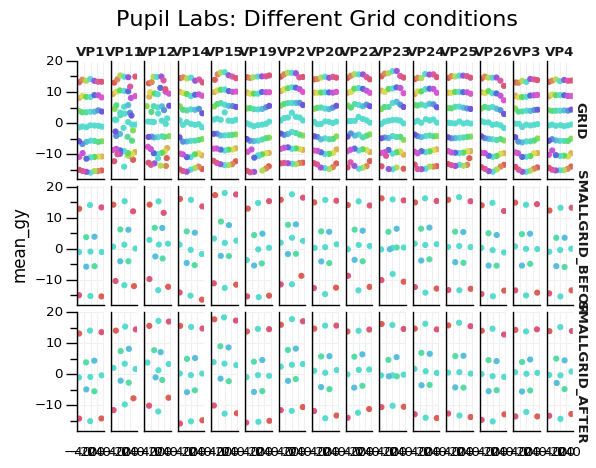

In [74]:
# investigate on the position and properties of detected fixations
LARGE_and_SMALL_GRID.display_fixations(raw_all_grids_df, option='fixations')

# Shake

In [75]:
from functions.et_helper import winmean,winmean_cl_boot
shakevalues = shake.shake_x.unique()
def find_min(list,target):
    return(list[np.argmin(np.abs(list-target))])
closest_grid = [find_min(raw_all_grids_df.query('condition!="GRID"').posx.unique(),x) for x in shakevalues]


data = pd.concat([shake,raw_all_grids_df.query("condition!='GRID'&posy==0")])

data = data.groupby(['eyetracker','condition','posx','subject'],as_index=False).agg(winmean)

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:363: UserWarning: stat_summary : Removed 300 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function


/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/plotnine/layer.py:452: UserWarning: geom_point : Removed 300 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


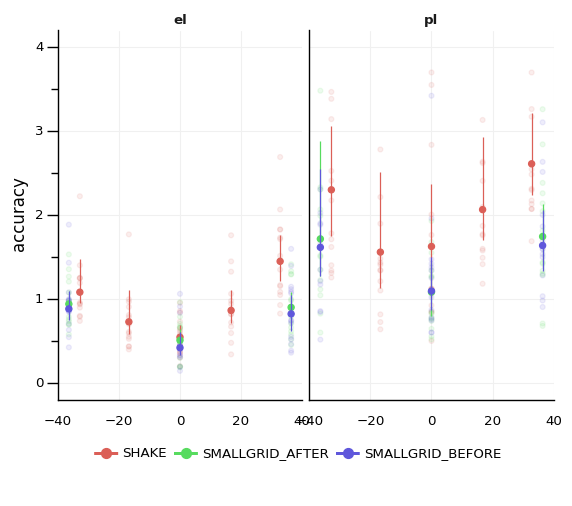

<ggplot: (8750795336375)>

In [76]:
(ggplot(data,aes(x='posx',y='accuracy',color='condition'))+geom_point(alpha=0.1)+stat_summary(fun_data=winmean_cl_boot)+ facet_wrap("eyetracker"))+coord_cartesian(ylim=[0,4])

# Rotate

In [98]:
from functions.et_helper import winmean

tilt = etmsgs.query('condition=="TILT"')
tilt.loc[:,'element'] = tilt.groupby(['subject','eyetracker','block','condition','exp_event']).cumcount()

tilt.loc[:,'angle_shift'] = tilt.angle.shift(1)
from functions.et_make_df import make_epochs
tilt_mean_all = pd.DataFrame()
for subject in etmsgs.subject.unique():
    for et in etmsgs.eyetracker.unique():
        subjectquery = 'subject==@subject & eyetracker==@et'
        
        try:
            tilt_epoch = make_epochs(etsamples.query(subjectquery),tilt.query(subjectquery), td=[-0.5,0])
            tilt_mean = tilt_epoch.groupby(['subject','eyetracker','block','angle_shift','element'],as_index=False).agg(winmean)
            tilt_mean.loc[:,'eyetracker'] = et
            tilt_mean.loc[:,'subject'] = subject
            tilt_mean_all = pd.concat([tilt_mean_all,tilt_mean])
        except:
            print('TILT: could not do sub:%s and et:%s'%(subject,et))

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


msg 0 from 96
msg 50 from 96
msg 0 from 96
msg 50 from 96
2018-10-08 23:09:13 - functions.et_make_df                                              - WARNING  - warning, no sample found for msg 78
msg 0 from 96
msg 50 from 96
msg 0 from 96
msg 50 from 96
msg 0 from 96
msg 50 from 96
msg 0 from 96
msg 50 from 96
2018-10-08 23:09:25 - functions.et_make_df                                              - WARNING  - warning, no sample found for msg 90
msg 0 from 96
msg 50 from 96
msg 0 from 96
msg 50 from 96
msg 0 from 96
2018-10-08 23:09:33 - functions.et_make_df                                              - WARNING  - warning, no sample found for msg 12
2018-10-08 23:09:33 - functions.et_make_df                                              - WARNING  - warning, no sample found for msg 22
2018-10-08 23:09:33 - functions.et_make_df                                              - WARNING  - warning, no sample found for msg 29
msg 50 from 96
msg 0 from 96
msg 50 from 96
msg 0 from 96
msg 50 from

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


2018-10-08 22:26:17 - matplotlib.font_manager                                           - DEBUG    - findfont: Matching :family=DejaVu Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=11.0 to DejaVu Sans ('/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000


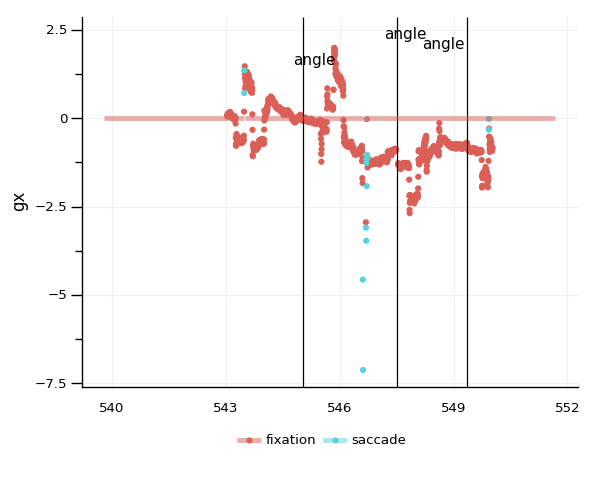

<ggplot: (-9223363286059349104)>

In [78]:
et_helper.plot_around_event(etsamples,etmsgs,etevents,tilt.query(subjectquery).iloc[3],plusminus=(-2,5),bothET=False)

used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function
used the winsorized mean function


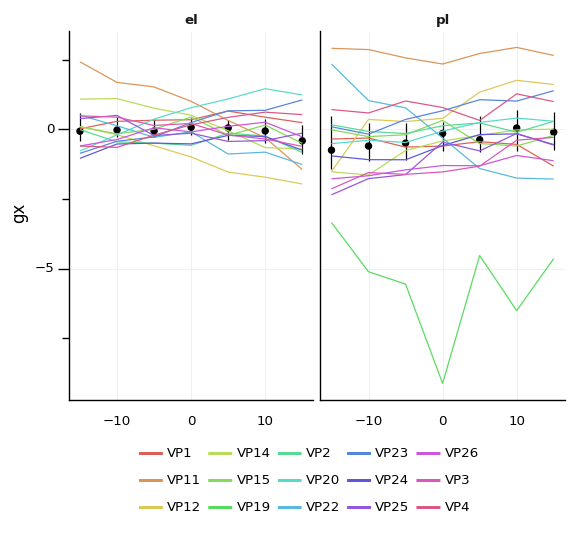

<ggplot: (-9223363286043378246)>

In [114]:
ggplot(tilt_mean_all.groupby(['angle_shift','subject','eyetracker'],as_index=False).agg(winmean),aes(x='angle_shift',y='gx'))+geom_path(aes(group="subject",color="subject"))+facet_wrap("eyetracker")